# Una brevísima introducción a archivos FITS
En esta lección aprenderemos brevemente lo que son los archivos FITS, también veremos algunas de las herramientas para abrir estos archivos con Python. Estos archivos se utlizan generalmente en astronomía.

## ¿Qué es un archivo FITS?
FITS es un acrónimo de Flexible Image Transport System, es un formato muy usado en astronomía para transportar, analizar y archivas datos científicos. FITS es más que otro formato de imagen, está diseñado para guardar datasets multidimensionales, y múltiples tablas de dos dimensiones, organizados en filas y columnas.

Para una explicación más detallada, visite la [Documentación de FITS](https://fits.gsfc.nasa.gov/fits_documentation.html)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from astropy.io import fits

We will first load the image named '502nmos.fits' from our drive
Después de importar nuestras librerías vamos a abrir el archivo 502nmos.fits.
Todos los archivos también se pueden descargar en [este enlace](https://esahubble.org/projects/fits_liberator/eagledata/)

In [21]:
#Abrir el archivo fits con astropy
eagle502 = fits.open('502nmos.fits')

In [22]:
#imprimir el objeto fits
eagle502

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x0000022888ED4A60>, <astropy.io.fits.hdu.table.TableHDU object at 0x0000022888F18FD0>]

Now, if we call `eagle502.info()` we should get some information about our image and its headers. Lets explain what a header or HDU is.
Si ahora llamamos `eagle502.info()` deberíamos obtener información sobre nuestra imagen y su header/encabezado. Expliquemos lo que es un Header o un HDU.

In [23]:
eagle502.info()

Filename: 502nmos.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     290   (1600, 1600)   float32   
  1  502nmos_cvt.tab    1 TableHDU       353   1R x 49C   [D25.17, D25.17, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, A1, E15.7, I12, I12, D25.17, D25.17, A8, A8, I12, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, I12, I12, I12, I12, I12, I12, I12, I12, A48, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7, E15.7]   


La mayor parte del tiempo la información de la imagen estará en el Header `PRIMARY` o primario, podemos ver que esta imagen tiene 2 HDU o dos Header Data Unit. Un HDU es un componente de FITS que contiene la data asociada y medatada.

<img src='https://camo.githubusercontent.com/ab52e6eaf40e324c379b7051df5690d3d1d2b435/687474703a2f2f7777772e73747363692e6564752f696e737472756d656e74732f77667063322f57667063325f6468622f696d616765732f696e74726f5f636832612e676966' width=600>

También podemos explorar los HDU como si se tratase de una lista, aquí hay un ejemplo explorando en HDU Primario de nuestra imagen

In [24]:
eagle502[0]

Hay mucha información en las cabeceras de nuestra imagen, para llamar a estos headers solo utilizamos `.header`

In [25]:
eagle502[0].header

SIMPLE  =                    T / FITS STANDARD                                  
BITPIX  =                  -32 / FITS BITS/PIXEL                                
NAXIS   =                    2 / NUMBER OF AXES                                 
NAXIS1  =                 1600 /                                                
NAXIS2  =                 1600 /                                                
EXTEND  =                    T / There maybe standard extensions                
BSCALE  =                1.0E0 / REAL = TAPE*BSCALE + BZERO                     
BZERO   =                0.0E0 /                                                
OPSIZE  =                 2112 / PSIZE of original image                        
ORIGIN  = 'STScI-STSDAS'       / Fitsio version 21-Feb-1996                     
FITSDATE= '2005-07-01'         / Date FITS file was created                     
FILENAME= '502nmos_cvt.hhh'    / Original filename                              
ALLG-MAX=           0.000000

In [26]:
eagle502[1].header

XTENSION= 'TABLE   '           / Ascii table extension                          
BITPIX  =                    8 / 8-bits per 'pixels'                            
NAXIS   =                    2 / Simple 2-D matrix                              
NAXIS1  =                  796 / Number of characters per row                   
NAXIS2  =                    1 / The number of rows                             
PCOUNT  =                    0 / No 'random' parameters                         
GCOUNT  =                    1 / Only one group                                 
TFIELDS =                   49 / Number of fields per row                       
EXTNAME = '502nmos_cvt.tab'    / Name of table                                  
                                                                                
TTYPE1  = 'CRVAL1  '           /                                                
TBCOL1  =                    1 /                                                
TFORM1  = 'D25.17  '        

También podemos extraer los datos de la imagen llamando la propiedad `.data` del archivo FITS. Podemos ver que esto se puede importar como un arreglo 2D. Utilizaremos Numpy para manejar esto.

In [27]:
eagle502[0].data

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [28]:
data502 = eagle502[0].data

In [29]:
data502.shape

(1600, 1600)

In [30]:
data502.dtype.name

'float32'

Intentemos graficar nuestros datos

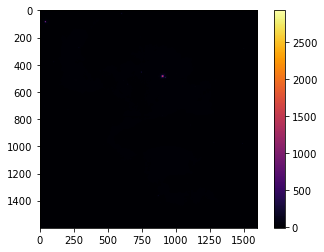

In [31]:
plt.imshow(data502, cmap='inferno')
plt.colorbar()

No es muy emocionante. Podemos ver que toda nuestra data está en un rango muy pequeño. Veamos el siguiente histograma para entender esto.

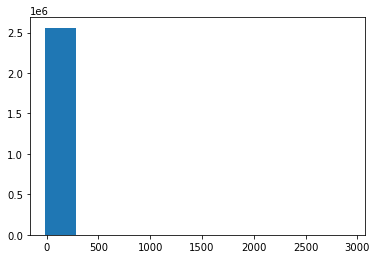

In [33]:
histogram = plt.hist(data502.flat, bins=10)

[Text(1, 4000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

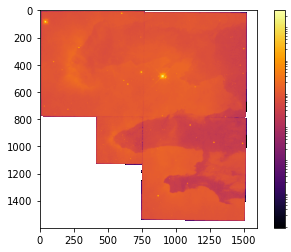

In [35]:
from matplotlib.colors import LogNorm
from astropy.visualization import make_lupton_rgb

plt.imshow(data502, cmap='inferno', norm=LogNorm())
cbar = plt.colorbar(ticks=[4.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

In [36]:
eagle656 = fits.open('656nmos.fits')
eagle673 = fits.open('673nmos.fits')

In [37]:
eagle656Data = eagle656[0].data
eagle673Data = eagle673[0].data

[Text(1, 4000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

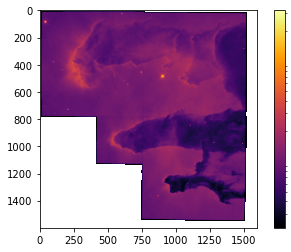

In [38]:
#Visualizar nuestras imagenes
plt.imshow(eagle656Data, cmap='inferno', norm=LogNorm())
cbar = plt.colorbar(ticks=[4.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

[Text(1, 4000.0, '5,000'),
 Text(1, 10000.0, '10,000'),
 Text(1, 20000.0, '20,000')]

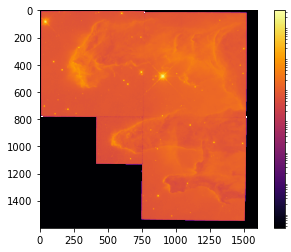

In [39]:
#Visualizar nuestras imagenes
plt.imshow(eagle673Data, cmap='inferno', norm=LogNorm())
cbar = plt.colorbar(ticks=[4.e3,1.e4,2.e4])
cbar.ax.set_yticklabels(['5,000','10,000','20,000'])

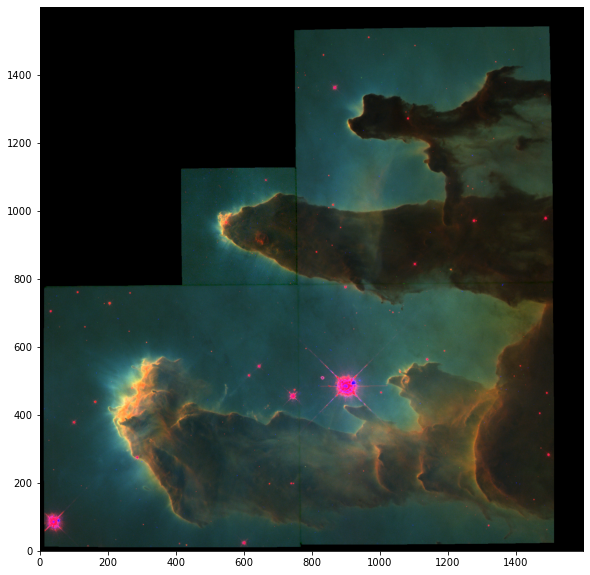

In [40]:
#Convertir y escalar nuestras imagenes 
#Convertir nuestros datos a rgb
rgb_default = make_lupton_rgb(eagle673Data*5, eagle656Data*0.75, data502*8, stretch=300, Q=0.001)
figure(figsize=(10,10))
plt.imshow(rgb_default, origin='lower')

Ahora saben cómo abrir archivos FITS y crear esta hermosa foto de los [Pilares de la Creación](https://www.nasa.gov/image-feature/the-pillars-of-creation).

Una cosa final que podríamos hacer es tratar de ajustar algunos de los picos espectrales de la imagen, estas son las secciones rosadas de la imagen. Intentemos arreglar eso. Aplicaremos un filtro de umbral para que ciertos valores arriba de un número no se muestren en la imagen, y luego volveremos a convertir los valores a RGB. Un filtro de este tipo solo trata de limitar o reestringir los valores númericos a un rango específico. Con esta reestricción podemos definir un límite numérico para nuestros valores de pixeles y valores en color.

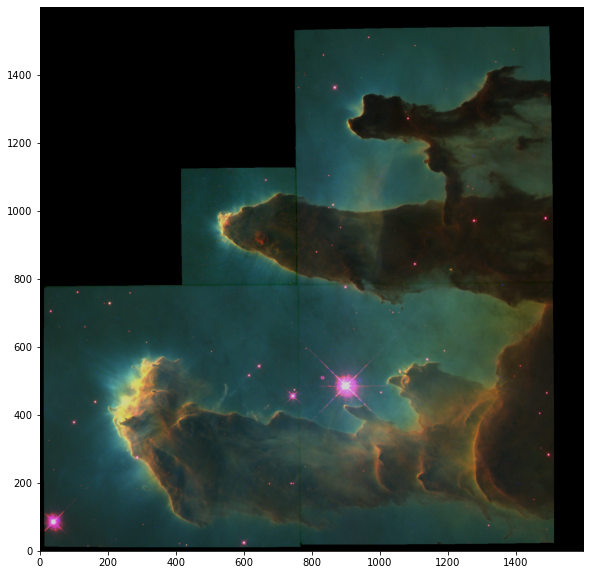

In [41]:
#convertir a arreglo y tratar de escalar los valores de nuestra imagen
#los valores están basados en prueba y error, se pueden probar diferentes valores
forc = np.float_()
eagle673Data = np.array(eagle673Data, forc) * 5
eagle656Data = np.array(eagle656Data, forc) * 0.75 
data502 = np.array(data502, forc) * 8

#definir umbral de valor
t = 250
eagle673Data[eagle673Data > t] = t
eagle656Data[eagle656Data > t] = t
data502[data502 > t] = t

#convertir a RGB
#crear una figura y mostrar imagen
rgb_default = make_lupton_rgb(eagle673Data, eagle656Data, data502, stretch=300, Q=0.001)
figure(figsize=(10,10))
plt.imshow(rgb_default, origin='lower')